# Face Recognition

**Step-1 importing libraries**

In [7]:
import glob
import dlib
import cv2
import pickle
import random
import facevec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imutils import face_utils


In [2]:
def adjust_gamma(input_image, gamma=1.0):
    table = np.array([((iteration / 255.0) ** (1.0 / gamma)) * 255
                      for iteration in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(input_image, table)

In [3]:
def read_image(path, gamma=0.75):
    output = cv2.imread(path)
    return adjust_gamma(output, gamma=gamma)

In [4]:
def face_vector(input_image):
    faces = facevec.detector(input_image, 1)
    if not faces:
        return None

    f = faces[0]
    shape = facevec.predictor(input_image, f)
    face_descriptor = facevec.face_model.compute_face_descriptor(input_image, shape)
    return face_descriptor

In [5]:
male = 0
female = 1

In [6]:
print("Retrieving Male images ...")
sub1 = glob.glob("./data/face_data/male/*.png")
print("Retrieved {} faces !".format(len(sub1)))

print("Retrieving female images ...")
sub2 = glob.glob("./data/face_data/female/*.png")
print("Retrieved {} faces !".format(len(sub2)))


Retrieving Male images ...
Retrieved 75 faces !
Retrieving female images ...
Retrieved 64 faces !


In [7]:
vectors = dlib.vectors()
labels = dlib.array()

In [8]:
print("Reading Males images ...")
for i, sub in enumerate(sub1):
    print("Reading {} of {}\r".format(i, len(sub1)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(male)

Reading Males images ...
Reading 0 of 75
Reading 1 of 75
Reading 2 of 75
Reading 3 of 75
Reading 4 of 75
Reading 5 of 75
Reading 6 of 75
Reading 7 of 75
Reading 8 of 75
Reading 9 of 75
Reading 10 of 75
Reading 11 of 75
Reading 12 of 75
Reading 13 of 75
Reading 14 of 75
Reading 15 of 75
Reading 16 of 75
Reading 17 of 75
Reading 18 of 75
Reading 19 of 75
Reading 20 of 75
Reading 21 of 75
Reading 22 of 75
Reading 23 of 75
Reading 24 of 75
Reading 25 of 75
Reading 26 of 75
Reading 27 of 75
Reading 28 of 75
Reading 29 of 75
Reading 30 of 75
Reading 31 of 75
Reading 32 of 75
Reading 33 of 75
Reading 34 of 75
Reading 35 of 75
Reading 36 of 75
Reading 37 of 75
Reading 38 of 75
Reading 39 of 75
Reading 40 of 75
Reading 41 of 75
Reading 42 of 75
Reading 43 of 75
Reading 44 of 75
Reading 45 of 75
Reading 46 of 75
Reading 47 of 75
Reading 48 of 75
Reading 49 of 75
Reading 50 of 75
Reading 51 of 75
Reading 52 of 75
Reading 53 of 75
Reading 54 of 75
Reading 55 of 75
Reading 56 of 75
Reading 57 of 75

In [9]:
print("Reading Female  images ...")
for i, sub in enumerate(sub2):
    print("Reading {} of {}\r".format(i, len(sub2)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(female)

Reading Female  images ...
Reading 0 of 64
Reading 1 of 64
Reading 2 of 64
Reading 3 of 64
Reading 4 of 64
Reading 5 of 64
Reading 6 of 64
Reading 7 of 64
Reading 8 of 64
Reading 9 of 64
Reading 10 of 64
Reading 11 of 64
Reading 12 of 64
Reading 13 of 64
Reading 14 of 64
Reading 15 of 64
Reading 16 of 64
Reading 17 of 64
Reading 18 of 64
Reading 19 of 64
Reading 20 of 64
Reading 21 of 64
Reading 22 of 64
Reading 23 of 64
Reading 24 of 64
Reading 25 of 64
Reading 26 of 64
Reading 27 of 64
Reading 28 of 64
Reading 29 of 64
Reading 30 of 64
Reading 31 of 64
Reading 32 of 64
Reading 33 of 64
Reading 34 of 64
Reading 35 of 64
Reading 36 of 64
Reading 37 of 64
Reading 38 of 64
Reading 39 of 64
Reading 40 of 64
Reading 41 of 64
Reading 42 of 64
Reading 43 of 64
Reading 44 of 64
Reading 45 of 64
Reading 46 of 64
Reading 47 of 64
Reading 48 of 64
Reading 49 of 64
Reading 50 of 64
Reading 51 of 64
Reading 52 of 64
Reading 53 of 64
Reading 54 of 64
Reading 55 of 64
Reading 56 of 64
Reading 57 of 

# Training

In [10]:
type(vectors)

dlib.vectors

In [11]:
vec = np.array(vectors)

In [12]:
lab = np.array(labels)

In [13]:
vec.shape

(131, 128)

In [14]:
lab.shape

(131,)

> **Saving into csv file**

In [15]:
X = vec
y = lab.reshape(-1,1)

In [16]:
X.shape

(131, 128)

In [17]:
dataset = np.append(X,y,axis = 1)

In [18]:
np.savetxt('face_vectors.csv',dataset,delimiter = ',')

> ## Test Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

> ## Building Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier


In [22]:
model_knn = KNeighborsClassifier(n_neighbors=3)


In [23]:
model_knn.fit(x_train, y_train) # training model



/home/praveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation


In [25]:
from sklearn.metrics import confusion_matrix, classification_report


In [26]:
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix


cr_knn = classification_report(y_test, y_pred_knn) # classification report

In [27]:
import seaborn as sns

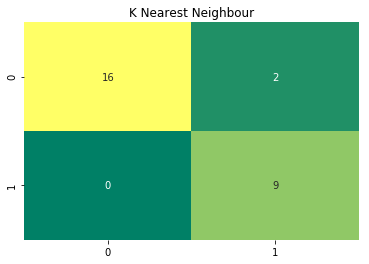

In [28]:
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'summer')
plt.title('K Nearest Neighbour')
plt.show()

In [29]:
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)

====================KNearest Neighbour====================
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        18
         1.0       0.82      1.00      0.90         9

   micro avg       0.93      0.93      0.93        27
   macro avg       0.91      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



In [30]:
from sklearn.externals import joblib

In [31]:
joblib.dump(model_knn,'gender_class.pkl')

['gender_class.pkl']

# Desison Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT_model = DecisionTreeClassifier()

In [34]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_pred_DT = DT_model.predict(x_test)

In [36]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

In [ ]:
cm_DT.